# SF Salaries Exercise 

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

** Import pandas as pd.**

In [1]:
import pandas as pd

** Read Salaries.csv as a dataframe called sal.**

In [2]:

sal = pd.read_csv(r'C:\Users\MONU\Downloads\Salaries.csv')
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


** Check the head of the DataFrame. **

** Use the .info() method to find out how many entries there are.**

In [3]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

In [4]:
sal.describe().T.loc["BasePay","mean"]

66325.44884050643

** What is the highest amount of OvertimePay in the dataset ? **

In [5]:
sal.describe().T.loc["OvertimePay","max"]

245131.88

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [6]:
sal[sal["EmployeeName"]=='JOSEPH DRISCOLL']["JobTitle"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

** How much does JOSEPH DRISCOLL make (including benefits)? **

In [7]:
sal["Total"] = sal["TotalPay"]+sal["TotalPayBenefits"]
sal[sal["EmployeeName"]=='JOSEPH DRISCOLL']["Total"]

24    540649.82
Name: Total, dtype: float64

** What is the name of highest paid person (including benefits)?**

In [10]:
sal[sal["Total"]==max(sal["Total"])]["EmployeeName"]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [11]:
sal[sal["Total"]==min(sal["Total"])]["EmployeeName"]

148653    Joe Lopez
Name: EmployeeName, dtype: object

** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [27]:
condition1 = sal["Year"]>2010 
condition2 =sal["Year"]<2015
sal[condition1][condition2].groupby("Year").mean()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Notes,Status,Total
Year,,,,,,,,,,
2011,18080.0,63595.956517,4531.065429,3617.081926,NaN,71744.103871,71744.103871,NaN,NaN,143488.207742
2012,54542.5,65436.406857,5023.417824,3653.437583,26439.966967,74113.262265,100553.229232,NaN,NaN,174666.491498
2013,91728.5,69630.030216,5281.641980,3819.969007,23829.076572,77611.443142,101440.519714,NaN,NaN,179051.962856
2014,129593.0,66564.421924,5401.993737,3505.421251,24789.601756,75463.918140,100250.918884,NaN,NaN,175714.837024


** How many unique job titles are there? **

In [33]:
len(sal["JobTitle"].value_counts())

2159

** What are the top 5 most common jobs? **

In [35]:
sal["JobTitle"].value_counts()[0:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [54]:
sal13=sal[sal["Year"]==2013]
sal13 =sal13.groupby("JobTitle").count()
len(sal13[sal13["Id"]==1])

202

** How many people have the word Chief in their job title? (This is pretty tricky) **

In [64]:
sal["isChief"] = sal["JobTitle"].apply(lambda x:x.find("Chief")>0)
len(sal[sal["isChief"]==True])

225

** Bonus: Is there a correlation between length of the Job Title string and Salary? **

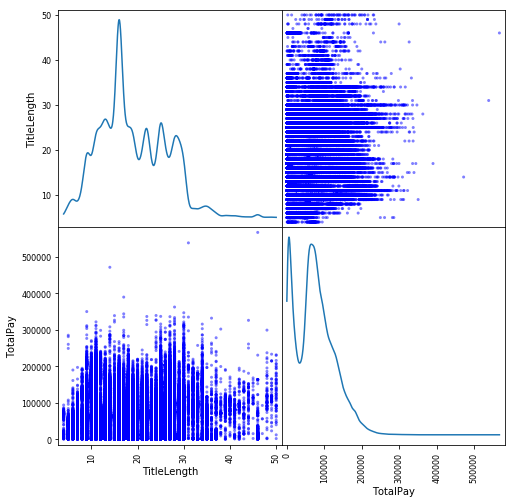

In [73]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
sal["TitleLength"]=sal["JobTitle"].apply(lambda x:len(x))
# sal.head()

scatter_matrix(sal[["TitleLength","TotalPay"]], figsize= (8,8), diagonal='kde', color = 'b')
plt.show()

# Great Job!